# STOCK ANALYSIS NOTEBOOK: Reliance Industries Ltd.

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf


In [19]:
# 1. Download Reliance Stock Data
ticker_symbol = "RELIANCE.NS"  # NSE: Reliance Industries
df = yf.download(ticker_symbol, start="2025-01-01", end="2025-08-01")

C:\Users\Hp\AppData\Local\Temp\ipykernel_20184\3854894151.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, start="2025-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


In [20]:
# Preview data
if df is not None:
	print(df.head())
else:
	print("Data download failed. 'df' is None.")

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2025-01-01  1216.391846  1221.421805  1206.780209  1210.017281     5892590
2025-01-02  1236.860107  1239.499468  1215.146780  1216.391808    15486276
2025-01-03  1246.172974  1257.029638  1230.585205  1238.951814    15521102
2025-01-06  1213.154785  1256.979753  1210.166719  1248.961727    14816766
2025-01-07  1235.913818  1239.549323  1216.391812  1217.138829    10070505


In [21]:
# 2. Basic Info
print("\nData Summary:")
print(df.describe())


Data Summary:
Price         Close         High          Low         Open        Volume
Ticker  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS   RELIANCE.NS
count    146.000000   146.000000   146.000000   146.000000  1.460000e+02
mean    1333.000782  1344.423999  1320.855794  1332.301518  1.199154e+07
std      106.304262   106.491481   107.190558   107.110040  5.313253e+06
min     1157.277954  1166.590715  1110.415052  1127.696009  0.000000e+00
25%     1237.955750  1250.667533  1228.157421  1237.644459  8.208891e+06
50%     1295.027832  1301.651330  1280.087474  1296.571668  1.052446e+07
75%     1424.186890  1434.993799  1415.222731  1423.813417  1.420638e+07
max     1535.367920  1544.830101  1524.112811  1530.586938  3.253897e+07


In [22]:
# 3. Daily Returns Calculation
df['Daily Return'] = df[('Close', ticker_symbol)].pct_change()

In [23]:
# 4. Moving Averages
df['MA50'] = df[('Close', ticker_symbol)].rolling(window=50).mean()
df['MA200'] = df[('Close', ticker_symbol)].rolling(window=200).mean()

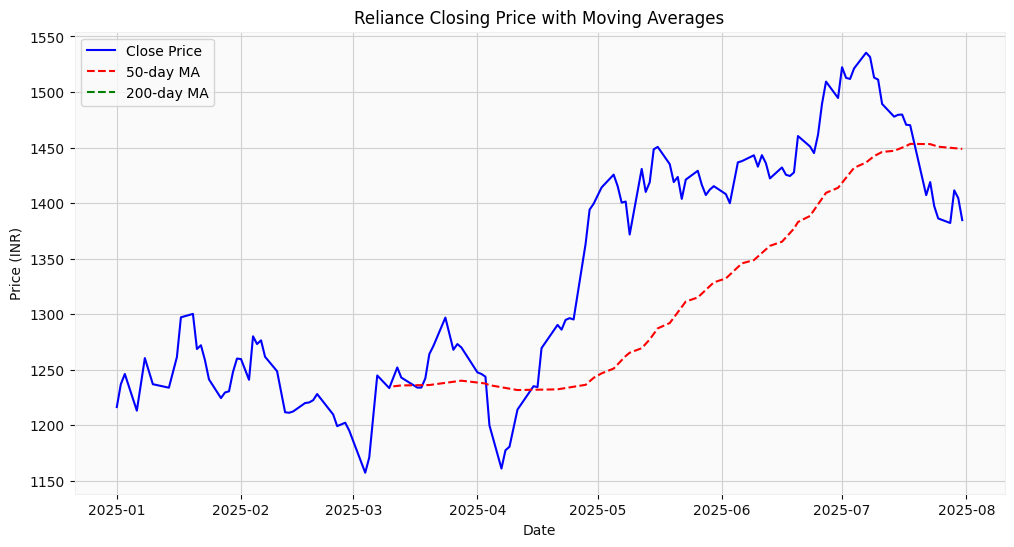

In [24]:
# 5. Plot Closing Price with Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df[('Close', ticker_symbol)], label="Close Price", color='blue')
plt.plot(df[('MA50', )], label="50-day MA", color='red', linestyle="--")
plt.plot(df[('MA200', )], label="200-day MA", color='green', linestyle="--")
plt.title("Reliance Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

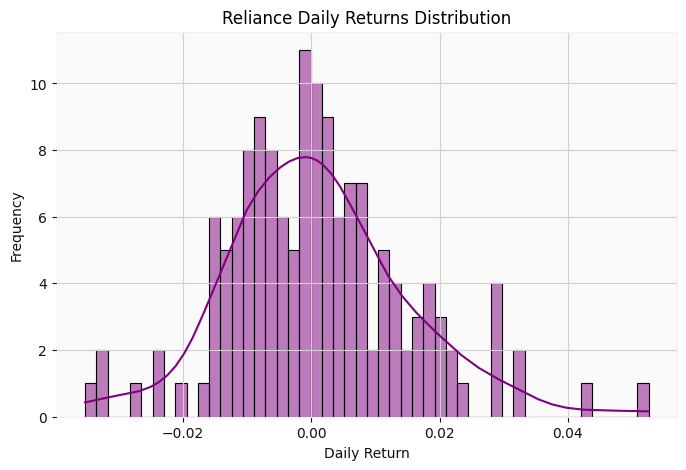

In [25]:
# 6. Daily Return Distribution
plt.figure(figsize=(8,5))
sns.histplot(df[('Daily Return', )].dropna(), bins=50, kde=True, color='purple')
plt.title("Reliance Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

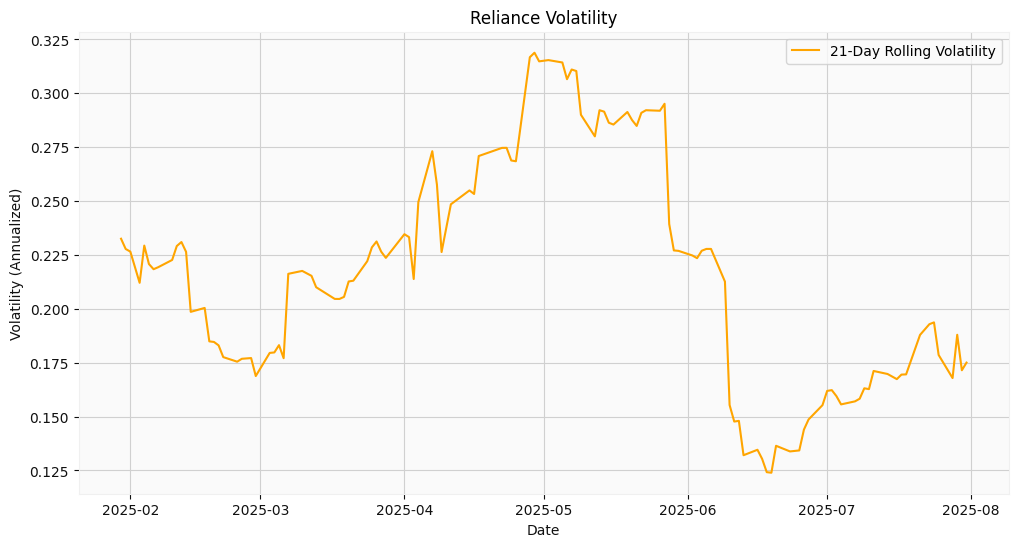

In [26]:
# 7. Volatility (Rolling Std Dev)
df['Volatility'] = df['Daily Return'].rolling(window=21).std() * (252**0.5)  # Annualized
plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label='21-Day Rolling Volatility', color='orange')
plt.title("Reliance Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Annualized)")
plt.legend()
plt.grid(True)
plt.show()

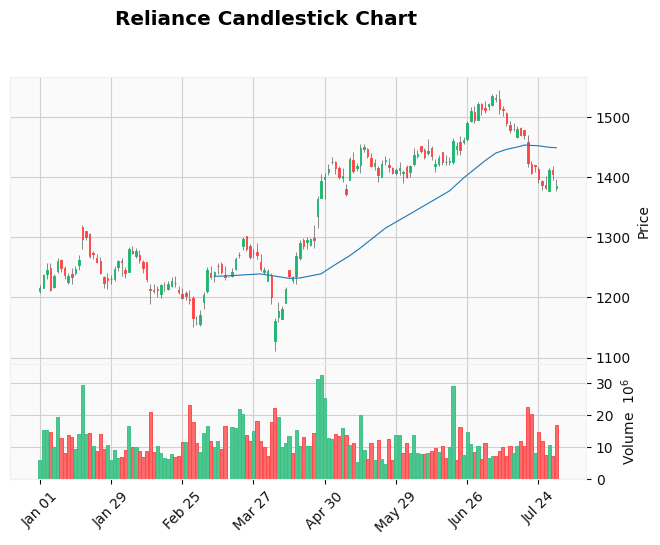

In [27]:
# 8. Candlestick Chart

# Flatten columns and rename for mplfinance
df_mpf = df.copy()
df_mpf.columns = [col[0] if isinstance(col, tuple) else col for col in df_mpf.columns]
df_mpf = df_mpf[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df_mpf, type='candle', volume=True, style='yahoo', title="Reliance Candlestick Chart", mav=(50, 200))

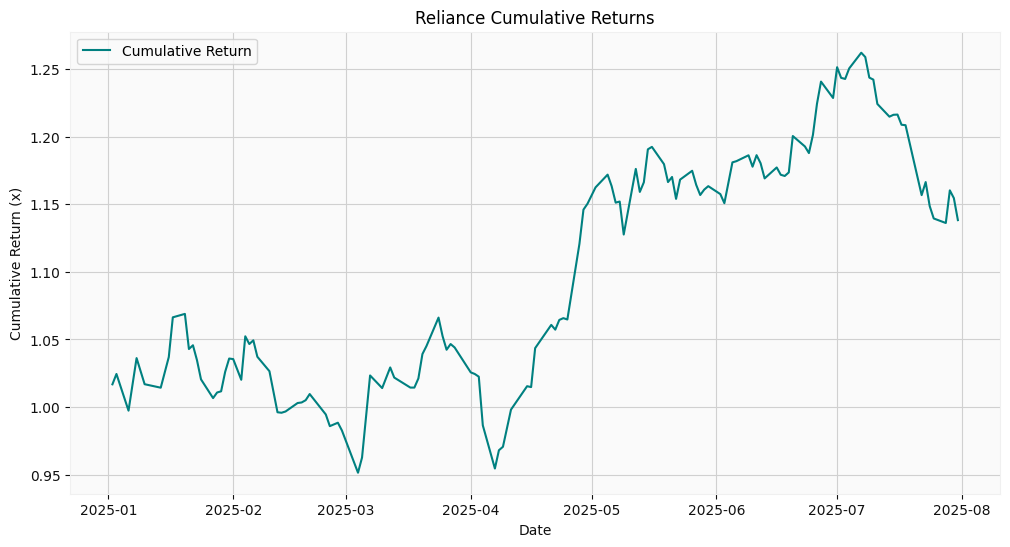

In [28]:
# 9. Cumulative Returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(df['Cumulative Return'], label='Cumulative Return', color='teal')
plt.title("Reliance Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (x)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Save the processed data
df.to_csv("Reliance_Stock_Analysis.csv")
print("\nAnalysis completed and saved as 'Reliance_Stock_Analysis.csv'")


Analysis completed and saved as 'Reliance_Stock_Analysis.csv'
